# Stopping Times

https://en.wikipedia.org/wiki/Stopping_time

[*********************100%***********************]  1 of 1 completed


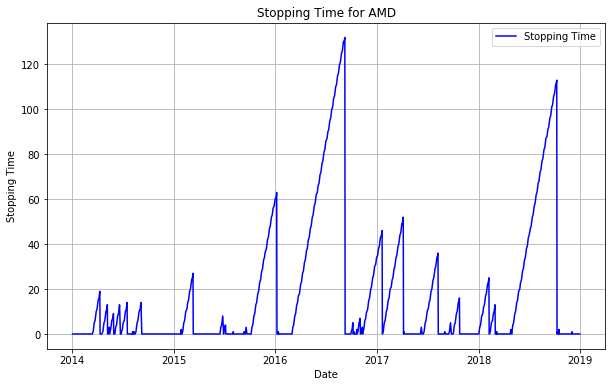

In [1]:
import warnings
warnings.filterwarnings("ignore")

import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stopping time function
def calculate_stopping_time(dataset):
    # Calculate the rolling mean of the 'Close' prices
    dataset['RollingMean'] = dataset['Close'].rolling(window=50).mean()

    # Initialize a stopping time column with 0 values
    dataset['StoppingTime'] = 0

    # Calculate the stopping time
    for i in range(50, len(dataset)):
        if dataset['Close'][i] > dataset['RollingMean'][i]:
            dataset['StoppingTime'][i] = dataset['StoppingTime'][i - 1] + 1
        else:
            dataset['StoppingTime'][i] = 0

# Input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Apply the stopping time function
calculate_stopping_time(dataset)

# Plot the 'StoppingTime' column
plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset['StoppingTime'], label='Stopping Time', color='blue')
plt.title(f'Stopping Time for {symbol}')
plt.xlabel('Date')
plt.ylabel('Stopping Time')
plt.legend()
plt.grid()
plt.show()

In [2]:
def is_stopping_time(data, tau_values):
    """
    Check if a random variable τ is a stopping time with respect to the given stock price data.
    
    Parameters:
    - data: DataFrame with stock price data.
    - tau_values: List of τ values to check for being a stopping time.
    
    Returns:
    - List of Boolean values indicating whether each τ value is a stopping time.
    """
    is_stopping_time_list = []
    
    for tau in tau_values:
        # Iterate through τ values and check the stopping time condition
        is_stopping_time = all(data['Close'].shift(-tau).notnull())
        is_stopping_time_list.append(is_stopping_time)
    
    return is_stopping_time_list

# Example usage
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol, start, end)

# Define some τ values to check if they are stopping times
tau_values = [1, 5, 10]

# Check if τ values are stopping times
result = is_stopping_time(dataset, tau_values)

# Print the results
for i, tau in enumerate(tau_values):
    print(f"τ = {tau} is a stopping time: {result[i]}")

[*********************100%***********************]  1 of 1 completed
τ = 1 is a stopping time: False
τ = 5 is a stopping time: False
τ = 10 is a stopping time: False


In [3]:
def is_stopping_time_stock_price(data, tau):
    # Extract the stock prices
    stock_prices = data['Close']

    # Check if tau is within the range of available dates
    if tau < 0 or tau >= len(stock_prices):
        return False

    # Check if stock price at tau is known at time tau
    for t in range(tau + 1):
        if pd.isna(stock_prices.iloc[t]):
            return False

    return True

# Example usage:
# Check if tau = 5 is a stopping time with respect to stock prices
tau = 5
result = is_stopping_time_stock_price(dataset, tau)
if result:
    print(f"τ = {tau} is a stopping time with respect to stock prices.")
else:
    print(f"τ = {tau} is not a stopping time with respect to stock prices.")

τ = 5 is a stopping time with respect to stock prices.


In [4]:
# Function to check if a given time 'tau' is a stopping time
def is_stopping_time_discrete(price_data, tau):
    if tau >= 0 and tau < len(price_data):
        return True
    return False

# Example usage:
# Define a specific 'tau' value
tau = 5

# Test if 'tau' is a stopping time
result = is_stopping_time_discrete(dataset['Close'], tau)
if result:
    print(f"τ = {tau} is a stopping time.")
else:
    print(f"τ = {tau} is not a stopping time.")

τ = 5 is a stopping time.
